<a href="https://colab.research.google.com/github/20211527/dl07/blob/main/notebook/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 3s 0us/step


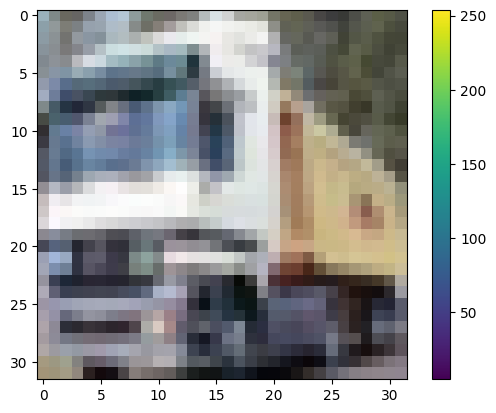

In [1]:
# import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np

# CFAR-10 데이터 세트를 적재한다.
# 훈련 세트와 테스트 세트를 반환받는다. 
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# 두 번째 영상(트럭)을 화면에 표시한다. 
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [2]:
# 영상의 픽셀 값을 0에서 1 사이로 변환한다. 
X_train = X_train/255.0
X_test = X_test/255.0

# 순차 모델을 구축한다. 
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 ), input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# 모델을 컴파일한다. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# 모델을 훈련한다. 
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 93s 84ms/step - loss: 1.5471 - accuracy: 0.4427 - val_loss: 1.3283 - val_accuracy: 0.5285
Epoch 2/10
1094/1094 [==============================] - 93s 85ms/step - loss: 1.1903 - accuracy: 0.5785 - val_loss: 1.1644 - val_accuracy: 0.5895
Epoch 3/10
1094/1094 [==============================] - 86s 79ms/step - loss: 1.0197 - accuracy: 0.6435 - val_loss: 1.0439 - val_accuracy: 0.6342
Epoch 4/10
1094/1094 [==============================] - 85s 78ms/step - loss: 0.9004 - accuracy: 0.6859 - val_loss: 1.0128 - val_accuracy: 0.6457
Epoch 5/10
1094/1094 [==============================] - 82s 75ms/step - loss: 0.8140 - accuracy: 0.7145 - val_loss: 1.0381 - val_accuracy: 0.6469
Epoch 6/10
1094/1094 [==============================] - 84s 76ms/step - loss: 0.7499 - accuracy: 0.7374 - val_loss: 0.9922 - val_accuracy: 0.6640
Epoch 7/10
1094/1094 [==============================] - 80s 73ms/step - loss: 0.6865 - accuracy: 0.7594 - val_loss: 1.0036 -

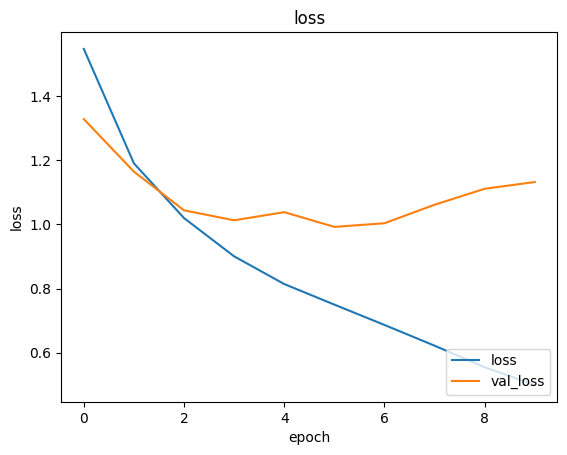

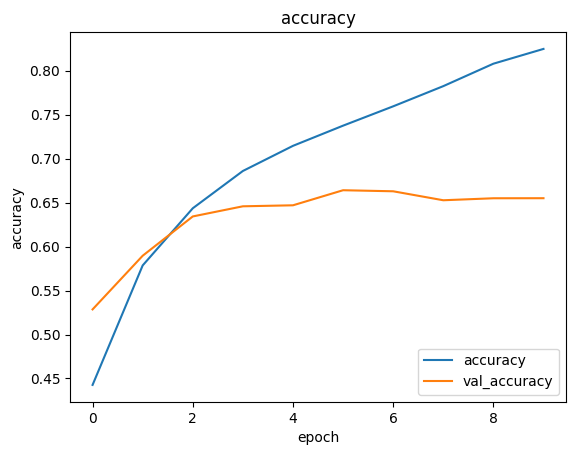

313/313 [==============================] - 5s 15ms/step
정답= [3]
예측값= [8.5217762e-05 3.0548429e-06 8.0645857e-03 7.9507178e-01 6.7026529e-04
 1.8538795e-01 3.5644642e-03 3.2347729e-05 7.1200137e-03 3.2571629e-07] 3
313/313 [==============================] - 6s 20ms/step - loss: 1.1371 - accuracy: 0.6553


[1.1370900869369507, 0.6553000211715698]

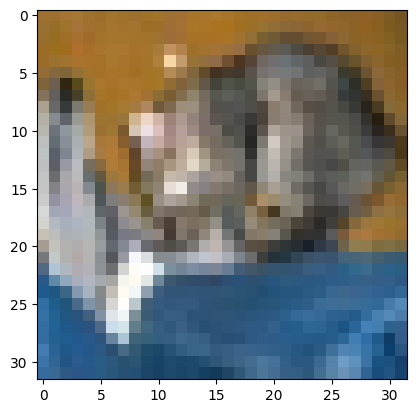

In [3]:
# 손실값을 그래프로 그린다. 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

# 정확도를 그래프로 그린다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc = 'lower right')
plt.show()

plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0], np.argmax(y_pred[0]))

#################################
# Evaluate the model
#################################
model.evaluate(X_test,y_test)
